In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from lightkurve import search_lightcurvefile, search_targetpixelfile

import astropy.units as u
from astropy.constants import R_sun

In [ ]:
df = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/21_10_2020_flares.csv")

In [ ]:
df.loc[df.TIC.isin([237880881, 44984200, 277539431]), ["ampl_rec","tstart", "TIC"]]

In [ ]:
select = df[df.ampl_rec>0.2]
select_ticsec = select[["TIC","Sector"]].drop_duplicates()

In [ ]:
select_ticsec.shape

In [ ]:
select = pd.DataFrame({"TIC":[237880881, 44984200, 277539431],
                       "Sector":[1,8,12]})

In [ ]:
def get_snr_periodogram(TIC, sec):
    TIC = int(TIC)
    sec = int(sec)

    lc = search_lightcurvefile(f"TIC {TIC}",sector=sec,cadence="short", ).download(
                               download_dir="/home/ekaterina/Documents/001_science/TESS_UCD_flares/lcs")

    lc = lc.get_lightcurve("PDCSAP_FLUX")

    per = lc.remove_nans().to_periodogram(minimum_period=0.05, maximum_period=1.).flatten()
    snr, period = per.max_power.value, per.period_at_max_power.value
    print(TIC, sec, snr, period)
    with open("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/21_10_2020_lombscargle.csv","a") as f:
        f.write(fr"{TIC},{sec},{snr},{period}")
        f.write("\n")
    return snr, period
#     print(snr)
#     per.flatten().plot(view="period")

In [ ]:
res = select_ticsec.apply(lambda x: get_snr_periodogram(x.TIC, x.Sector), axis=1)

In [ ]:
per.flatten().plot(view="period")

In [ ]:
lomb = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/21_10_2020_lombscargle.csv")

selectlomb = select.merge(lomb, how="left", on=["TIC","Sector"])

In [ ]:
selectlomb.head()

In [ ]:
selectlomb_snr = selectlomb[(selectlomb.snr > 2.) & 
                            (selectlomb.period < .5)  & 
                            (selectlomb.Sector < 27)].sort_values(by="TIC")

In [ ]:
selectlomb_snr.head(20)

In [ ]:
selectlomb_snr.to_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/21_10_2020_fastrot_largeflares.csv")

In [2]:
selectlomb_snr = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/21_10_2020_fastrot_largeflares.csv")

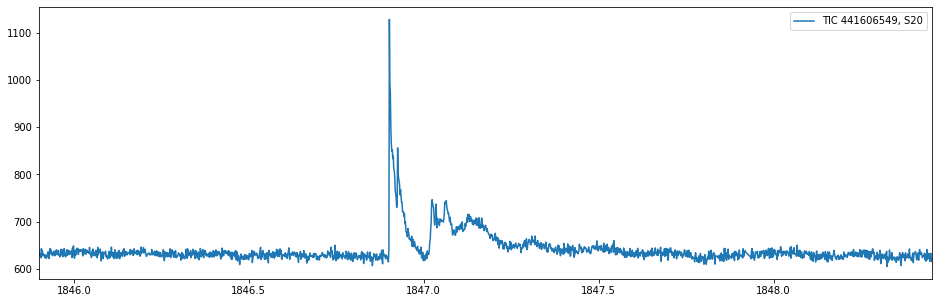

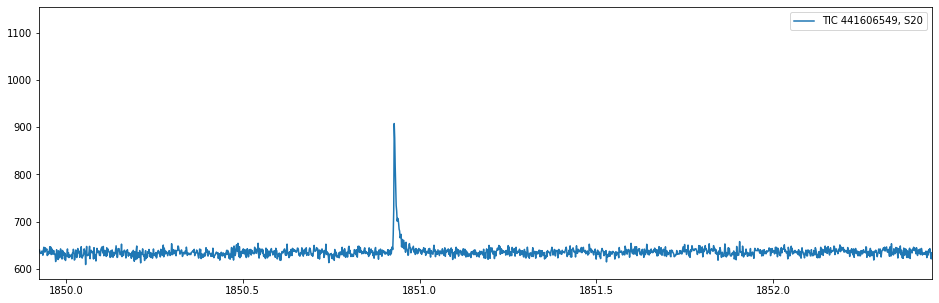

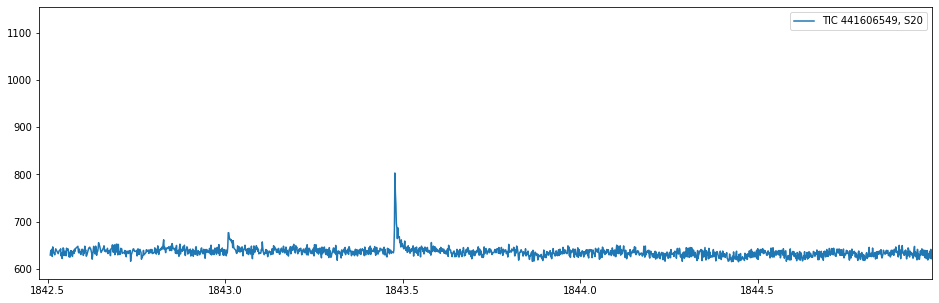

In [7]:
TIC, sec = 441606549,20#int(row.TIC), int(row.Sector)
sdf = selectlomb_snr[(selectlomb_snr.TIC == TIC) & (selectlomb_snr.Sector==sec)]#selectlomb_snr.iloc[28]
lc = search_lightcurvefile(f"TIC {TIC}",sector=sec,cadence="short", ).download(
                                   download_dir="/home/ekaterina/Documents/001_science/TESS_UCD_flares/lcs")
lc = lc.get_lightcurve("PDCSAP_FLUX")

for i, row in sdf.iterrows():
    fig, ax = plt.subplots(figsize=(16,5))
    ax.plot(lc.time, lc.flux, label=f"TIC {TIC}, S{sec}")
    ax.set_xlim(row.tstart-1., row.tstop+1.5)
#     plt.ylim(300,550)
    plt.legend();

In [ ]:
lc

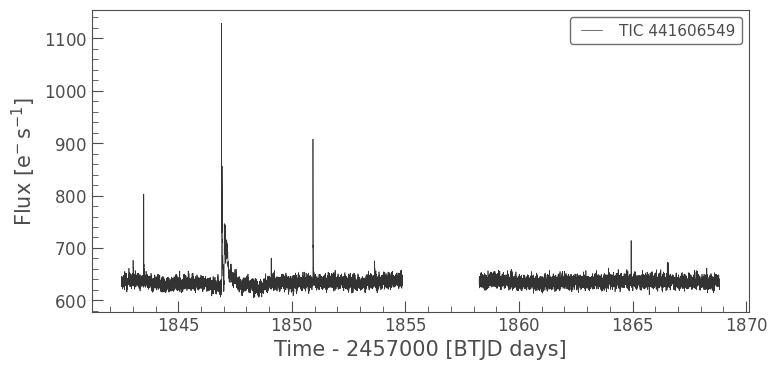

In [18]:
lc.plot()
# plt.xlim(1846, 1849)
# plt.ylim(600,900)


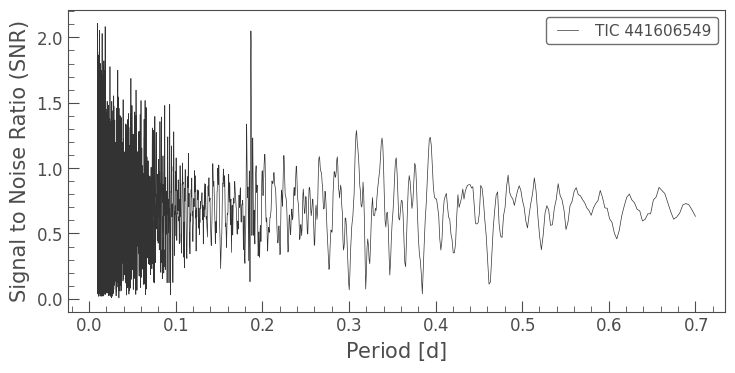

In [11]:
per = lc.remove_nans().to_periodogram(minimum_period=0.01, maximum_period=.7).flatten()
snr, period = per.max_power.value, per.period_at_max_power.value

per.plot(view="period")

In [9]:
tpf = search_targetpixelfile(f"TIC {TIC}", sector=sec).download()

In [10]:
tpf.interact()

In [ ]:
vsini = 29.7 * u.km / u.s
P = 0.176 * u.d

In [ ]:
np.arcsin((vsini * P / 2 / np.pi / .137 / R_sun).decompose())/np.pi*180

In [ ]:
5 * 60 * 60

In [16]:
gaia = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/gaia/crossmatch_5_arcsec.csv")


#98615312
gaia.columns

Index(['angDist', 'designation', 'ra', 'ra_error', 'dec', 'dec_error',
       'parallax', 'g_rp', 'TIC', 'RAdeg', 'DEdeg', 'HIP', 'TYC', 'UCAC4',
       '2MASS', 'objID', 'WISEA', 'GAIA', 'APASS', 'KIC', 'S/G', 'Ref',
       'r_Pos', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'r_pm', 'Plx', 'e_Plx',
       'Vmag', 'e_Vmag', 'Gmag', 'e_Gmag', 'Tmag', 'e_Tmag', 'f_Tmag', 'Flag',
       'Teff', 's_Teff', 'logg', 's_logg', '[M/H]', 'e_[M/H]', 'Rad', 's_Rad',
       'Mass', 's_Mass', 'Dist', 's_Dist', 'E(B-V)', 's_E(B-V)', 'e_Dist',
       'E_Dist', 'RAOdeg', 'DEOdeg'],
      dtype='object')

In [17]:
gaia[gaia.TIC == TIC].T

,2570
angDist,2.26152
designation,Gaia DR2 1110937688187635456
ra,116.535
ra_error,0.0489763
dec,72.5489
dec_error,0.0790569
parallax,27.2651
g_rp,1.31342
TIC,441606549
RAdeg,116.536


In [5]:
50000/2/60/60

6.944444444444445